In [2]:
def hint(string): return print(''.join(map(chr, map(lambda x: int(x, 16), string.split('.')))))

## Environment
+ Pycharm
+ python3.6
+ networkx
+ jieba
+ numpy, pandas, matplotlib
+ gensim

## References

+ https://nlp.stanford.edu/pubs/see2017get.pdf
+ https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf
+ https://openreview.net/pdf?id=SyK00v5xx
+ https://arxiv.org/abs/1409.0473
+ 

## Background Knowledge

Q1. 简述自动摘要技术的三个应用场景？

回答：1.资讯类网站或app新闻摘要抽取。2.法律案件关键信息抽取。3.人物观点提取。

##### 提示，如果需要帮助，可以运行以下的提示

In [3]:
# remove the # before hint(), to show the example sulution
hint('a.641c.7d22.5f15.64ce.ff1b.a.32.2e.20.89c2.70b9.62bd.53d6.ff1b.a.33.2e.20.65b0.95fb.ff1b.a.34.2e.20.6c47.62a5.6587.6863.a')


搜索引擎；
2. 观点抽取；
3. 新闻；
4. 汇报文档



Q2. 目前的摘要技术分为哪两类？

回答：生成式和抽取式。

In [ ]:
#hint('a.6458.8981.20.41.62.73.74.72.61.63.74.69.76.65.3a.20.91cd.65b0.6574.7406.4fe1.606f.a.62bd.53d6.20.45.78.74.72.61.63.74.69.76.65.3a.20.4ece.539f.6587.4e2d.63d0.53d6.90e8.5206.a')

Q3. 目前实现自动摘要的难点在哪里？列出三点。

回答：1.文本关键信息识别需要基于全文语义的理解。2.文本摘要的答案不唯一，不同人可能有不同观点，歧义性较大，难以评价。3.训练数据少，需要基于无监督方法。

In [4]:
hint('a.31.2e.20.7f3a.4e4f.6807.6ce8.8bad.7ec3.6570.636e.ff1b.a.32.2e.20.57fa.4e8e.6587.672c.7406.89e3.ff0c.63d0.53d6.91cd.8981.5185.5bb9.96be.ff1b.a.33.2e.20.4eba.7c7b.5bf9.6587.672c.903b.8f91.654f.611f.ff0c.6458.8981.7ed3.679c.5bb9.9519.7387.4f4e.a')


1. 缺乏标注训练数据；
2. 基于文本理解，提取重要内容难；
3. 人类对文本逻辑敏感，摘要结果容错率低



## Basic Technologies

Q4. 什么是PageRank？ PageRank 用在什么地方？用 $Latex$ 写出其方程

回答： pagerank是google用于评估其网页质量的算法。

In [ ]:
#hint('a.31.2e.20.65b9.7a0b.3a.a.20.20.20.20.50.52.28.70.5f.69.29.20.3d.20.a.72.61.63.7b.31.2d.64.7d.7b.4e.7d.20.2b.20.64.20.5c.73.75.6d.5f.7b.70.5f.6a.20.5c.69.6e.20.4d.28.70.5f.69.29.7d.20.a.72.61.63.7b.50.52.20.28.70.5f.6a.29.7d.7b.4c.28.70.5f.6a.29.7d.a.32.2e.20.53c2.8003.ff1a.a.20.20.20.20.68.74.74.70.73.3a.2f.2f.77.77.77.2e.77.69.6b.69.77.61.6e.64.2e.63.6f.6d.2f.65.6e.2f.50.61.67.65.52.61.6e.6b.a')

Q5. PageRank和TextRank的关系是什么，TextRank的背景原理是什么？ 

回答：textrank是基于pagerank的原理对文本中的关键词或句子的重要性进行排名，从而得到关键信息的算法。

In [ ]:
#hint('a.53c2.8003.8bba.6587.ff1a.20.68.74.74.70.73.3a.2f.2f.77.65.62.2e.65.65.63.73.2e.75.6d.69.63.68.2e.65.64.75.2f.7e.6d.69.68.61.6c.63.65.61.2f.70.61.70.65.72.73.2f.6d.69.68.61.6c.63.65.61.2e.65.6d.6e.6c.70.30.34.2e.70.64.66.a')

Q6. 在存在大量原始文本以及该文本对应的摘要内容时，我们是否可以使用 Seq2Seq 进行生成？ Sequence2Sequence的原理是什么？ Attention的机制原理是什么？ 

回答：可以。seq2seq的原理是对输入信息进行编码，然后解码生成目标序列。attention的机制类似机器翻译模型中“对齐”的概念，目标输出序列中某个token的生成与输入序列中各个token的关系大小不一，attention计算得到每个输入token对输出token的“贡献值”大小，从而能够更准确的生成输出token。

### Extractive, Abstractive 
+ Extractive是从文中找出关键信息，然后拼接进行结果输出
    + 确定重要信息
+ Abstracrtive: 依据文本的输入，生产单词（可能是新的单词）进行结果输出
    + Seq2Seq的问题
    + Transfomer

## Data Pipeline

我们首先加载数据

In [4]:
import pandas as pd
import numpy as np
import jieba
import os

def cut(string): return ' '.join(jieba.cut(string))
path_root = r'/home/student/project/project-02/nlp_strong/autosummary/data'
news_file = os.path.join(path_root, 'sqlResult_1558435.csv') 
# this file could downloaded from github group's : 
#  https://github.com/Artificial-Intelligence-for-NLP-Chinese/datasource 

In [5]:
news_content = pd.read_csv(news_file, encoding='gb18030')
news_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [6]:
news_content.iloc[4]['url']

'http://news.163.com/17/0618/00/CN617P3Q0001875P.html'

In [42]:
news_content.head(200).to_csv(os.path.join(path_root,'sqlResult_example.csv'),index=False,header=True,encoding='gb18030')

In [39]:
pd.DataFrame.to_csv?

然后进行：
    1. 把content这一列全部拿出来
    2. 对content进行切词
    3. 统计单词出现的频率格式
    4. 其他的分析
`提示`：相关代码可以在Github Group的Slides里边的Lecture18，自动摘要里边看到。 

## 使用TextRank进行自动摘要提取

#### Task 1 使用neteworkx包，建立一个随机图，对该图进行PageRank分析


In [ ]:
#hints: 代码可以在Github Group 中看到

In [7]:
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import networkx as nx

In [9]:
er = nx.random_graphs.erdos_renyi_graph(20,0.2)

In [10]:
def plot_graph(graph):
    plt.subplot(121)
    pos = nx.spectral_layout(graph)
    nx.draw(graph, with_labels=True)
    plt.show()

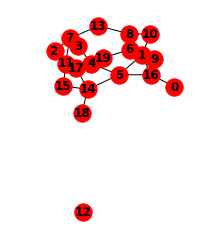

In [11]:
plt.subplot(121)
pos = nx.spectral_layout(er)
nx.draw(er, with_labels=True, font_weight='bold',)
plt.show()

In [12]:
pr = nx.pagerank(er, alpha=0.9)

In [13]:
pr

{0: 0.020649055302388277,
 1: 0.0814393500719565,
 2: 0.03584895025334578,
 3: 0.03559644076319469,
 4: 0.06638874707820608,
 5: 0.06613436121183003,
 6: 0.05058519818256923,
 7: 0.06854382434115575,
 8: 0.06685771257698776,
 9: 0.05048385925024371,
 10: 0.034937734197524516,
 11: 0.06708529731124936,
 12: 0.005235602094240837,
 13: 0.03570158745413402,
 14: 0.07061668931070332,
 15: 0.03621753182947159,
 16: 0.06850411181541362,
 17: 0.06751039983931989,
 18: 0.021123922591338242,
 19: 0.05053962452472697}

#### Task 2 使用PageRank 对文本进行关联分析

In [ ]:
# hints: 代码可以在Github Group 中看到

In [14]:
import codecs
import os
import re
import string
import json

sent_cut_pattern = [
    re.compile(r'([。？！?])([^"\'”])'),
    re.compile(r'(\.{6})([^"\'”])'),
    re.compile(r'([。？！?]["\'”])([^\'"”])'),
]

def cut_sent(para):
    '''
    句子切分
    :param para:
    :return:
    '''
    for pat in sent_cut_pattern:
        para = pat.sub(r'\1\n\2',para)
    return para.split('\n')

In [15]:
news_content.iloc[0]['content']

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [16]:
cut_sent(news_content.iloc[0]['content'].replace('\r\n','\n'))

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。',
 '有人猜测这也是将精力主要用到MIUI 9的研发之中。',
 '',
 'MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。',
 '',
 '当然，关于MIUI 9的确切信息，我们还是等待官方消息。',
 '',
 '']

In [17]:
def get_sentences(content):
    sents = []
    content = content.strip().replace('\r\n','\n')
    for para in content.split('\n'):
        sents.extend(cut_sent(para))
    return sents

In [18]:
sentences = get_sentences(news_content.iloc[0]['content'])
sentences

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。',
 '有人猜测这也是将精力主要用到MIUI 9的研发之中。',
 'MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。',
 '当然，关于MIUI 9的确切信息，我们还是等待官方消息。']

加载stopwords

In [19]:
from typing import List,Set,Dict

In [20]:
stopwords_path = r'/home/student/project/project-02/nlp_strong/autosummary/data/chinese_stopwords.txt'
stopwords = []
with open(stopwords_path, 'r',encoding='utf8') as f:
    for line in f:
        line = line.strip()
        if len(line) > 0:
            stopwords.append(line.strip())
stopwords = set(stopwords)
    

In [21]:
import jieba
import math

puncs = string.punctuation + '.,;《》？！“”‘’@#￥%…&×（）——+【】{};；●，。&～、|\s:：'
punc_pattern = re.compile(r'[{}]+'.format(puncs))

def tokenize(string):
    string = string.strip()
    return list(jieba.cut(string))

def remove_punc(sentence:List[str]):
    return [token for token in sentence if not re.search(punc_pattern,token)]

def remove_stopwords(sentence:List[str]):
    return [token for token in sentence if token not in stopwords]

def sentence_sim(sentence1:List[str],sentence2:List[str]):
    '''
    句子相似度计算公式参考pagerank原始论文实现
    '''
    if len(sentence1) == 0 or len(sentence2) == 0:
        return 0
    overlap = set(sentence1) & set(sentence2)
    if math.log(len(sentence1)) + math.log(len(sentence2)) == 0:
        return 0
    sim = len(overlap) / (math.log(len(sentence1)) + math.log(len(sentence2)))
    return sim

In [22]:
tokenize(sentences[0])

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.870 seconds.
Prefix dict has been built succesfully.


['此外',
 '，',
 '自',
 '本周',
 '（',
 '6',
 '月',
 '12',
 '日',
 '）',
 '起',
 '，',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '，',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '（',
 '含',
 '开发',
 '版',
 '/',
 '体验版',
 '内测',
 '，',
 '稳定版',
 '暂不受',
 '影响',
 '）',
 '，',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '。']

In [23]:
remove_punc(tokenize(sentences[0]))

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日',
 '起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作']

In [24]:
remove_stopwords(remove_punc(tokenize(sentences[0])))

['此外',
 '本周',
 '除',
 '小米',
 '手机',
 '款',
 '机型',
 '外',
 '机型',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '确保',
 '工程师',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作']

In [25]:
sentence_sim(remove_stopwords(remove_punc(tokenize(sentences[0]))),remove_stopwords(remove_punc(tokenize(sentences[1]))))

0.18478666018026316

In [26]:
sentence_sim(remove_stopwords(remove_punc(tokenize(sentences[0]))),remove_stopwords(remove_punc(tokenize(sentences[2]))))

0.1894615908449756

In [27]:
sentence_sim(remove_stopwords(remove_punc(tokenize(sentences[0]))),remove_stopwords(remove_punc(tokenize(sentences[3]))))

0.0

In [28]:
sentence_sim(remove_stopwords(remove_punc(tokenize(sentences[1]))),remove_stopwords(remove_punc(tokenize(sentences[2]))))

0.2484254983984692

In [29]:
sentence_sim(remove_stopwords(remove_punc(tokenize(sentences[1]))),remove_stopwords(remove_punc(tokenize(sentences[3]))))

0.2583177668073288

In [30]:
sentence_sim(remove_stopwords(remove_punc(tokenize(sentences[2]))),remove_stopwords(remove_punc(tokenize(sentences[1]))))

0.2484254983984692

In [31]:
def generate_sentence_graph(sentences:List[str]):
    graph = nx.Graph()
    for i in range(len(sentences) - 1):
        sent_i = sentences[i]
        for j in range(i+1, len(sentences)):
            sent_j = sentences[j]
            sim = sentence_sim(remove_stopwords(remove_punc(tokenize(sent_i))),remove_stopwords(remove_punc(tokenize(sent_j))))
            if sim > 0:
                graph.add_edge(i,j)
                graph.edges[i,j]['weight'] = sim
    return graph

def auto_summary(content,sentence_nums=5):
    sentences = get_sentences(content)
    graph = generate_sentence_graph(sentences)
    pr = nx.pagerank(graph, weight='weight', alpha=0.9)
    selected_sent_nums = sorted(pr.items(),key=lambda x:x[1],reverse=True)[:sentence_nums]
    sorted_nums = sorted([num for num,pr_value in selected_sent_nums])
    return ''.join([sentences[num] for num in sorted_nums])

In [32]:
auto_summary(news_content.iloc[4]['content'])

'@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。大概走了有四十分钟吧，女子突然停下来说“我想回家了”，然后女子也接受了刘青递过来的小黄衣，就出现了深圳微博上的照片，女子披着小黄衣，刘青小心翼翼地在旁边走着的场景。'

In [33]:
graph = generate_sentence_graph(get_sentences(news_content.iloc[4]['content']))

In [34]:
sentences = get_sentences(news_content.iloc[4]['content'])
sentences_zip = list(zip(range(len(sentences)),sentences))
sentences_zip

[(0, '（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）'),
 (1, '@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。'),
 (2, '那么事发时'),
 (3, '到底都发生了些什么呢？'),
 (4, '南都记者带您一起还原现场'),
 (5, '南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。'),
 (6,
  '刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。'),
 (7, '女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。'),
 (8,
  '刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。'),
 (9, '此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。'),
 (10, '现场还原'),
 (11,
  '从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。'),
 (12, '当时正值上班高峰期，十字路口的车流已经排起了长队。'),
 (13, '当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。'),
 (14, '当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。'),
 (15, '记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。'),
 (16, '一大清早路上看到这样的情况'),
 (17, '恐怕大家都没办法淡定'),
 (18, '面对这一情况'),
 (19,
  '刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出

In [35]:
pr = nx.pagerank(graph, weight='weight', alpha=0.9)
sorted(pr.items(),key=lambda x:x[1],reverse=True)

[(8, 0.05736090695998117),
 (6, 0.050669528224753735),
 (1, 0.04738893680958147),
 (23, 0.04674741573442201),
 (14, 0.045559438828250615),
 (22, 0.042553681577827136),
 (9, 0.041257997593645096),
 (11, 0.040971760770859685),
 (24, 0.038336842326910016),
 (20, 0.03749289156870937),
 (13, 0.03646202135673869),
 (19, 0.03543921670818855),
 (29, 0.034465797745530276),
 (15, 0.03401822929475523),
 (0, 0.03346107376551803),
 (47, 0.027105932603471876),
 (5, 0.02602610767100315),
 (48, 0.025973354742679696),
 (28, 0.024670531747928985),
 (21, 0.023066511455643972),
 (41, 0.021895752650435443),
 (7, 0.021608474310184138),
 (37, 0.018018124082722298),
 (25, 0.017648684265974334),
 (45, 0.0168358593401223),
 (4, 0.015073157817184036),
 (42, 0.014059675632997372),
 (31, 0.012717024321974687),
 (16, 0.011995109568276735),
 (27, 0.011660099112500145),
 (46, 0.010952726831501853),
 (10, 0.009865891680746506),
 (18, 0.009269631344413455),
 (36, 0.00857909519749852),
 (3, 0.008377920613984777),
 (12, 

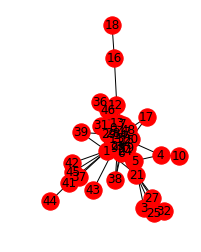

In [36]:
plot_graph(graph)

In [37]:
sentences = get_sentences(news_content.iloc[5]['content'])
sentences_zip = list(zip(range(len(sentences)),sentences))
sentences_zip

[(0,
  '受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金融股和白马股表现喜人，但是尾盘跳水之后，仅金融板块仍维系红盘状态。'),
 (1, '分析人士认为，金融股受益于MSCI纳入A股和低估值而重获资金青睐，但是存量资金博弈格局下，风格交替的震荡格局料延续。'),
 (2, '流动性改善、经济悲观预期修正等有助于支撑板块继而大盘指数逐步向好。'),
 (3, '\u3000\u3000“一九”再现'),
 (4, '\u3000\u3000周四，A股市场未能延续周三的上行态势，两市成交小幅放量。'),
 (5, '29个中信一级行业中，收盘仅银行和非银行金融两个行业指数收红，分别上涨1.80%和0.20%。'),
 (6,
  '\u3000\u3000从二级行业来看，股份制与城商行的涨幅最高，达到2.22%，国有银行上涨0.82%，信托及其他上涨0.64%，保险板块上涨0.34%，证券板块上涨0.06%。'),
 (7, '\u3000\u3000银行板块25只成分股中，共有21只收红。'),
 (8, '其中，招商银行涨幅最大，上涨6.66%，贵阳银行上涨3.65%，上海银行、华夏银行、浦发银行和兴业银行的涨幅均超过1.50%。'),
 (9, '非银行金融板块44只成分股中，共17只个股上涨。'),
 (10, '其中，安信信托、中国太保涨幅居前两名，分别上涨4.57%和3.04%，西水股份、华安证券、中国人寿和新华保险的涨幅也均超过2%。'),
 (11, '相对而言，券商股多小幅下跌。'),
 (12, '\u3000\u3000近期，对A股市场消息面影响最大的就是MSCI宣布从2018年6月开始将A股纳入MSCI新兴市场指数。'),
 (13, '而其中，金融股是占比最大的一个群体。'),
 (14,
  '国金证券李立峰团队指出，最新方案中包含的222只成分股中，剔除了中等市值、非互联互通可交易的股票以及有停牌限制的标的，由于纳入了很多大市值AH股，A股在MSCI EM中的权重由0.5%上升到了0.73%。'),
 (15, '其中，金融板块占比最高，达到40.11%，泛消费次之，占比为24.26%，两个板块涵盖了大部分权重股。'),
 (16, '动态来看，由于加入了很多是指占比高的金融公司，金融板块的

In [38]:
graph = generate_sentence_graph(get_sentences(news_content.iloc[5]['content']))
pr = nx.pagerank(graph, weight='weight', alpha=0.9)
sorted(pr.items(),key=lambda x:x[1],reverse=True)

[(0, 0.0952436255095603),
 (19, 0.06836860885258572),
 (1, 0.06759507027774947),
 (20, 0.06125083354099859),
 (12, 0.06103230120610907),
 (17, 0.06044641352387454),
 (5, 0.05697231755054616),
 (6, 0.055367421321275714),
 (9, 0.05283371020803464),
 (14, 0.04712198596357201),
 (4, 0.042791561389646196),
 (18, 0.042610143242086666),
 (16, 0.042277701819958435),
 (15, 0.03834090952412358),
 (7, 0.038058854035681905),
 (10, 0.03746284714527011),
 (8, 0.03643287972722594),
 (2, 0.03561068307539683),
 (21, 0.03164793321623601),
 (13, 0.02036322146860725),
 (11, 0.008170977401460491)]

In [39]:
auto_summary(news_content.iloc[5]['content'])

'受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金融股和白马股表现喜人，但是尾盘跳水之后，仅金融板块仍维系红盘状态。分析人士认为，金融股受益于MSCI纳入A股和低估值而重获资金青睐，但是存量资金博弈格局下，风格交替的震荡格局料延续。\u3000\u3000近期，对A股市场消息面影响最大的就是MSCI宣布从2018年6月开始将A股纳入MSCI新兴市场指数。\u3000\u3000光大证券指出，利好并未引起市场太大的热情，两市指数和成交量均较为平淡，但市场风格出现了较大变化，白马股金融股上涨的同时，成长股、题材股全天低迷。这表明市场增量资金依然很少，存量资金在不同板块之间腾挪，这样的跷跷板格局使得指数难有突破。'

In [40]:
news_content.iloc[5]['title']

'金融股一枝独秀 配置价值犹存'

Q6. 切句子是如何实现的？如何使用正则表达式进行句子分割？ 

回答：切分句子可以通过标点符号用正则表达式进行切分。中文中的句号、问号等都是句子自然的切分，此外再对特殊情况加上一些规则。

In [41]:
hint('a.70.61.74.74.65.72.6e.20.3d.20.72.65.2e.63.6f.6d.70.69.6c.65.28.27.5b.3002.ff0c.2c.2e.5d.ff1a.27.29.a.73.70.6c.69.74.20.3d.20.70.61.74.74.65.72.6e.2e.73.75.62.28.27.20.27.2c.20.73.65.6e.74.65.6e.63.65.29.2e.73.70.6c.69.74.28.29.20.20.23.20.73.70.6c.69.74.20.73.65.6e.74.65.6e.63.65.a')


pattern = re.compile('[。，,.]：')
split = pattern.sub(' ', sentence).split()  # split sentence



Q7. 如果对切词之后的句子的标点符号进行恢复？

回答：建立句子和标点符号之间的关系。

In [42]:
hint('a.63d0.793a.ff1a.5efa.7acb.53e5.5b50.548c.6807.70b9.7b26.53f7.4e4b.95f4.7684.5173.7cfb.ff0c.4f8b.5982.ff0c.5efa.7acb.4e00.4e2a.5b57.5178.a')


提示：建立句子和标点符号之间的关系，例如，建立一个字典



#### Task3 在Pycharm里边合并代码，合并成一个单独的函数，实现输入一篇文章，输出该文本的摘要流程

`Jupyter Notebook`里边适合做中间结果的记录以及想法验证，真正开发还是要在Pycharm等集成IDE里边进行

## 使用词向量进行自动摘要

Q8. 使用词向量进行自动摘要的基本假设是什么？ 

回答:1.整篇文章有一个“中心思想”。2.和这个中心思想意思相近的句子可以代表这篇文章的思想。

In [32]:
hint('a.53e5.5b50.5411.91cf.80fd.591f.8861.91cf.53e5.5b50.4e4b.95f4.7684.76f8.4f3c.5ea6.ff0c.6545.800c.53ef.4ee5.901a.8fc7.8be5.65b9.6cd5.5224.65ad.67d0.4e2a.53e5.5b50.662f.5426.548c.6587.672c.542b.4e49.76f8.5173.a')


句子向量能够衡量句子之间的相似度，故而可以通过该方法判断某个句子是否和文本含义相关



#### Task4. 使用普林斯顿2017年的sentence embedding方法，进行句子embedding的构建

Q9. 该句子embedding的原理是什么，有什么优势？ 

回答：该句子embedding的原理来源于对句子生成式的建模，求解得到句子中每个word的权重，通过词向量和word权重得到的句向量减去句向量矩阵的第一主成分得到句子的向量。该方法适用于通过word vector计算句向量，且效果优于同样无监督方法下的tf-idf weight。

In [33]:
hint('a.63d0.793a.ff1a.9891.7387.ff0c.91cd.8981.6027.ff0c.5feb.901f.ff0c.6027.80fd.597d.a')


提示：频率，重要性，快速，性能好



Q10. embedding是什么？ 用数学的方式解释embedding。

回答：embedding是把同一种事物映射到同一个向量空间，获得事物的分布式向量表达，从而用于后续计算任务。embedding就是向量化，与one-hot编码相比，维度更低，同时能表达事物之间相似性等一些关系。

In [34]:
hint('a.63d0.793a.ff1a.5047.8bbe.4e24.4e2a.65.6e.74.69.74.79.4fdd.6301.5177.6709.67d0.79cd.201c.504f.5e8f.201d.7279.6027.ff0c.5373.ff0c.53ef.4ee5.6bd4.8f83.ff0c.90a3.4e48.ff0c.5c06.8fd9.4e24.4e2a.20.65.6e.74.69.74.79.20.6295.5f71.5230.53e6.5916.7684.7a7a.95f4.4e2d.ff0c.5728.8be5.7a7a.95f4.4e2d.ff0c.8fd9.79cd.201c.504f.5e8f.201d.4f9d.7136.80fd.591f.4fdd.6301.a')


提示：假设两个entity保持具有某种“偏序”特性，即，可以比较，那么，将这两个 entity 投影到另外的空间中，在该空间中，这种“偏序”依然能够保持



Q11. 除了word embedding， sentence embedding， embedding还可以应用到哪些场景？

回答：document也可以embedding。类别等one-hot编码的形式都可以获得embedding形式。

In [35]:
hint('a.4f8b.5982.793e.4ea4.7f51.7edc.91cc.8fb9.4eba.5458.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.597d.53cb.63a8.8350.ff09.ff0c.20.8d2d.7269.7f51.7ad9.5546.54c1.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.5546.54c1.63a8.8350.ff09.a.53e6.5916.ff0c.53ef.4ee5.601d.8003.4e00.4e0b.57fa.4e8e.8fd9.79cd.65.6d.62.65.64.64.69.6e.67.7684.63a8.8350.7684.4f18.70b9.5728.54ea.91cc.ff1f.20.a')


例如社交网络里边人员的embedding（进行好友推荐）， 购物网站商品的embedding（进行商品推荐）
另外，可以思考一下基于这种embedding的推荐的优点在哪里？ 



Q12. 这种embedding的方法和tfidf有何异同？ 

回答：1.二者获得的句子的向量表达都可以用来评估句子的相似性。2.embedding获得的向量表达更“稠密”，而tf-idf获得的向量维度更高，更稀疏。3.只有当两个句子之间存在相同的word时，tf-idf计算出的相似性才不为0，而如果两个句子间存在很多相似意思的word,那么embedding计算出的二者的相似度也会很高，因此embedding更能表达语义上的相似度。

In [36]:
hint('a.63d0.793a.ff1a.74.66.69.64.66.8003.8651.7684.9891.7387.5176.20.74.66.20.548c.20.69.64.66.20.5206.522b.662f.4ec0.4e48.ff1f.20.8be5.65.6d.62.65.64.64.69.6e.67.7684.9891.7387.7c7b.4f3c.4e8e.4ec0.4e48.ff1f.20.a')


提示：tfidf考虑的频率其 tf 和 idf 分别是什么？ 该embedding的频率类似于什么？ 



Q13. 构建句子想了的过程中，面对未知的单词，如果解决？

回答:1.直接丢弃。2.词向量表中单独生成一个未知词的词向量，遇到未知单词就用这个词向量。3.训练word2vec时对出现次数小于某一个threshhold的单词都用一个特殊符号代替，训练得到这个特殊符号的词向量。

In [37]:
hint('a.5f00.53d1.578b.95ee.9898.ff0c.53ef.4ee5.7701.7565.ff0c.53ef.4ee5.8d4b.4e88.968f.673a.503c.ff0c.53ef.4ee5.7ed9.4e00.7279.5b9a.503c.ff0c.5177.4f53.60c5.51b5.9700.8981.7ecf.8fc7.8bd5.9a8c.8fdb.884c.5206.6790.a')


开发型问题，可以省略，可以赋予随机值，可以给一特定值，具体情况需要经过试验进行分析



Q14. 构建完成句子向量之后，句子相似度如何判断？ 

回答：可以计算余弦距离。

In [38]:
hint('a.63.6f.73.69.6e.65.ff0c.20.4f59.5f26.8ddd.79bb.a')


cosine， 余弦距离



Q15. 为什么要用cosine距离进行判断，为何不用欧几里得？ 

回答：

In [110]:
hint('a.63d0.793a.ff1a.8bf7.53c2.8003.77.6f.72.64.32.76.65.63.8bad.7ec3.65f6.5019.7684.7684.6982.7387.5206.5e03.7684.5b9a.4e49.ff0c.53ef.4ee5.770b.5230.5176.6c.6f.73.73.5f53.65f6.4f18.5316.7684.5c31.662f.20.65.78.70.28.76.31.20.2e.20.76.32.29.2c.20.90a3.4e48.5f53.20.76.31.20.2e.20.76.32.6700.5927.7684.65f6.5019.ff0c.a.5c31.662f.8fd9.4e24.4e2a.5411.91cf.65b9.5411.4e00.81f4.7684.65f6.5019.ff0c.6240.4ee5.ff0c.8be5.8bcd.5411.91cf.5728.8bad.7ec3.7684.65f6.5019.7684.6c.6f.73.73.7684.8861.91cf.ff0c.5c31.662f.4f9d.636e.65b9.5411.8fdb.884c.7684.3002.20.a')


提示：请参考word2vec训练时候的的概率分布的定义，可以看到其loss当时优化的就是 exp(v1 . v2), 那么当 v1 . v2最大的时候，
就是这两个向量方向一致的时候，所以，该词向量在训练的时候的loss的衡量，就是依据方向进行的。 



In [111]:
hint('a.53e6.5916.ff0c.4e5f.4e0d.662f.4e0d.80fd.7528.6b27.51e0.91cc.5f97.ff0c.4f46.662f.4f9d.636e.4e0a.4e00.63d0.793a.4e4b.5206.6790.ff0c.6b27.51e0.91cc.5f97.662f.4e0d.80fd.5f88.597d.4fdd.6301.8bed.4e49.76f8.4f3c.6027.7684.3002.20.a')


另外，也不是不能用欧几里得，但是依据上一提示之分析，欧几里得是不能很好保持语义相似性的。 



Q16. cosine距离的时候，如果两个向量的长度区别很大，但是方向类似，cosine的距离是小还是大？ 

回答：cosine距离的范围是-1~1，方向越一致，越接近1，否则越接近-1。

In [112]:
hint('63.6f.73.69.6e.65.53ea.8003.8651.201c.65b9.5411.201c.662f.5426.4e00.6837')

cosine只考虑“方向“是否一样


#### Task15 基于Sentene Embedding 在pycharm里边完成句子摘要的完整过程

In [43]:
import sys
sys.path.append('/home/student/project/project-02/nlp_strong/autosummary/src')
import os
os.chdir('/home/student/project/project-02/nlp_strong/autosummary')

In [44]:
from common.utils import get_sentences,cos_similarity
from common.SentSim import SentEmbedding
from typing import List,Set,Dict
import pandas as pd

def load_data():
    data = pd.read_csv('./data/sqlResult_1558435.csv',encoding='gb18030')
    return data

def get_all_sents(contents:List[str]):
    all_sents = []
    for news in contents:
        all_sents.append(get_sentences(news))
    return all_sents

def get_similarities(news_embd, sentences_embedding):
    similarities = []
    for i,embd in enumerate(sentences_embedding):
        if len(embd) == 0:
            continue
        similarities.append((i,cos_similarity(news_embd.flatten(), embd)))
    return similarities

def sent_embedding(all_sents):
    sent_embd = SentEmbedding()
    sent_embd.prepare(all_sents)
    return sent_embd

def get_summary(sent_embd:SentEmbedding, content:str, sents_limit=5):
    news = content.strip().replace('\r\n','').replace('\n','')
    sentences = get_sentences(content)
    news_embedding, news_no_ind = sent_embd.sents_embedding([news])
    sentences_embedding, sents_no_ind = sent_embd.sents_embedding(sentences)
    sentences_embedding = sentences_embedding.tolist()
    for indx in sents_no_ind:
        sentences_embedding.insert(indx,[])
    similarities = get_similarities(news_embedding, sentences_embedding)
    similarities.sort(key=lambda x:x[1],reverse=True)
    sents_nums = [num for num,sim in similarities[:sents_limit]]
    return ''.join([sentences[i] for i in sorted(sents_nums)])

def get_news_embedding(sent_embd:SentEmbedding, content:str):
    news = content.strip().replace('\r\n','').replace('\n','')
    news_embedding, news_no_ind = sent_embd.sents_embedding([news])
    return news_embedding

def get_sentences_embedding(sent_embd:SentEmbedding, content:str):
    sentences = get_sentences(content)
    sentences_embedding, sents_no_ind = sent_embd.sents_embedding(sentences)
    sentences_embedding = sentences_embedding.tolist()
    for indx in sents_no_ind:
        sentences_embedding.insert(indx,[])
    return sentences,sentences_embedding

def main():
    data = load_data()
    all_sents = get_all_sents(data['content'].dropna().tolist())
    sent_embed = sent_embedding(all_sents)
    content = data.iloc[4]['content']
    summary = get_summary(sent_embed, content, sents_limit=5)
    print('news : {}'.format(content))
    print('summary : {}'.format(summary))

In [45]:
data = load_data()
all_sents = get_all_sents(data['content'].dropna().tolist())

In [46]:
len(all_sents)

87054

In [47]:
sent_embed = sent_embedding(all_sents)

/home/student/anaconda3/envs/nlpstrong/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


word vectors and word freq write successfully...
shape : (764164, 100)


In [54]:
del all_sents

In [55]:
import sys

sys.getsizeof(sent_embed)

56

In [57]:
len(sent_embed.We)

286253

In [48]:
content0 = data.iloc[5]['content']

In [49]:
content0

'\u3000\u3000受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金融股和白马股表现喜人，但是尾盘跳水之后，仅金融板块仍维系红盘状态。分析人士认为，金融股受益于MSCI纳入A股和低估值而重获资金青睐，但是存量资金博弈格局下，风格交替的震荡格局料延续。流动性改善、经济悲观预期修正等有助于支撑板块继而大盘指数逐步向好。\r\n\u3000\u3000“一九”再现\r\n\u3000\u3000周四，A股市场未能延续周三的上行态势，两市成交小幅放量。29个中信一级行业中，收盘仅银行和非银行金融两个行业指数收红，分别上涨1.80%和0.20%。\r\n\u3000\u3000从二级行业来看，股份制与城商行的涨幅最高，达到2.22%，国有银行上涨0.82%，信托及其他上涨0.64%，保险板块上涨0.34%，证券板块上涨0.06%。\r\n\u3000\u3000银行板块25只成分股中，共有21只收红。其中，招商银行涨幅最大，上涨6.66%，贵阳银行上涨3.65%，上海银行、华夏银行、浦发银行和兴业银行的涨幅均超过1.50%。非银行金融板块44只成分股中，共17只个股上涨。其中，安信信托、中国太保涨幅居前两名，分别上涨4.57%和3.04%，西水股份、华安证券、中国人寿和新华保险的涨幅也均超过2%。相对而言，券商股多小幅下跌。\r\n\u3000\u3000近期，对A股市场消息面影响最大的就是MSCI宣布从2018年6月开始将A股纳入MSCI新兴市场指数。而其中，金融股是占比最大的一个群体。国金证券李立峰团队指出，最新方案中包含的222只成分股中，剔除了中等市值、非互联互通可交易的股票以及有停牌限制的标的，由于纳入了很多大市值AH股，A股在MSCI EM中的权重由0.5%上升到了0.73%。其中，金融板块占比最高，达到40.11%，泛消费次之，占比为24.26%，两个板块涵盖了大部分权重股。动态来看，由于加入了很多是指占比高的金融公司，金融板块的权重增加了近一半，其他大部分行业权重都受到了稀释。\r\n\u3000\u3000尽管A股被纳入MSCI这一利好事件对短期市场情绪有所提振、对中长期海外增量资金预期升温，但短期内，市场量能尚不能有效放大，金融股独乐乐情景也就难以持续。存量博弈格局下，风格交替、指数震荡格局难改变。\r\n\u

In [50]:
summary0 = get_summary(sent_embed, content0, sents_limit=3)
summary0

'受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金融股和白马股表现喜人，但是尾盘跳水之后，仅金融板块仍维系红盘状态。分析人士认为，金融股受益于MSCI纳入A股和低估值而重获资金青睐，但是存量资金博弈格局下，风格交替的震荡格局料延续。\u3000\u3000光大证券指出，利好并未引起市场太大的热情，两市指数和成交量均较为平淡，但市场风格出现了较大变化，白马股金融股上涨的同时，成长股、题材股全天低迷。'

In [51]:
content = data.iloc[4]['content']
summary = get_summary(sent_embed, content, sents_limit=5)

In [52]:
content

'（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。\r\n女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。\r\n此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。\r\n现场还原\r\n从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。\r\n当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。\r\n一大清早路上看到这样的情况\r\n恐怕大家都没办法淡定\r\n面对这一情况\r\n刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。\r\n刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要是你也遭遇我的

In [53]:
summary

'刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要是你也遭遇我的事，你也会这样的”，期间她还不时试图挣脱刘青的手要冲向护栏往下跳。大概走了有四十分钟吧，女子突然停下来说“我想回家了”，然后女子也接受了刘青递过来的小黄衣，就出现了深圳微博上的照片，女子披着小黄衣，刘青小心翼翼地在旁边走着的场景。'

In [58]:
news_embd = get_news_embedding(sent_embed, content)
news_embd

array([[ 0.14879047, -0.07472026, -0.06610667, -0.04177954,  0.03157748,
         0.03544774,  0.12853818,  0.02998502, -0.03584009,  0.04015497,
         0.08411419,  0.04472936, -0.08591948,  0.07266439, -0.0440102 ,
        -0.05043148,  0.16926274,  0.00565761, -0.08042543,  0.07537228,
         0.02784383,  0.04832811, -0.06573492, -0.00688443,  0.06553319,
         0.01271945,  0.07147263,  0.06605462,  0.02238134, -0.08473262,
        -0.00729193,  0.03429284,  0.11195355, -0.08413005,  0.00631193,
        -0.06949926,  0.16443301,  0.06384389,  0.05300671,  0.00195303,
        -0.06644564,  0.02150663,  0.09770536,  0.04484227, -0.01709236,
        -0.07404139,  0.08370231,  0.08291981, -0.03969393, -0.05150716,
        -0.10527811, -0.10304139,  0.04085686, -0.02561779, -0.06711475,
        -0.09187872, -0.00533994, -0.12711526,  0.11816723,  0.02213334,
        -0.09957216,  0.06502077, -0.12708332, -0.04971397,  0.01280766,
        -0.02812324,  0.01907552, -0.02793075,  0.1

In [59]:
news_embd.shape

(1, 100)

In [60]:
sentences,sentences_embedding = get_sentences_embedding(sent_embed, content)

In [21]:
similarities = get_similarities(news_embd, sentences_embedding)
similarities.sort(key=lambda x:x[1],reverse=True)

In [25]:
cos_similarity(sentences_embedding[1], sentences_embedding[7])
for i,embd in enumerate(sentences_embedding):
    print(i)
    print(cos_similarity(sentences_embedding[1], embd))

0
0.588120348156431
1
1.0
2
0.401518007231668
3
0.08689002316438132
4
0.39294477562695174
5
0.5997809551780835
6
0.7540437187750696
7
0.7728051459256495
8
0.7322911115175201
9
0.6502403945970495
10
0.2256773322094816
11
0.7238059717508826
12
0.49374526132650476
13
0.6183751993853922
14
0.7856658565186044
15
0.6988509756552871
16
0.49938884927851235
17
0.17570899103415905
18
0.050197960563029165
19
0.6975911152136456
20
0.629936954384222
21
0.5430868328744867
22
0.6133601519377454
23
0.7495589962211625
24
0.5649550740257598
25
0.2394525341238517
26
0.13432899582265512
27
0.2293910599938438
28
0.4033389102338929
29
0.564984684464456
30
-0.004579608848786387
31
0.4414177488318938
32
0.29301656358796246
33
0.10694303950453321
34
0.12930910431852594
35
0.054761058966489196
36
0.2513254153304416
37
0.616899232613397
38
0.21930079095819677
39
0.3038657645631816
40
0.27436113986725785
41
0.48358809396096136
42
0.4410167332040573
43
0.35342158366549337
44
0.3701517405183643
45
0.566319314980227

In [44]:
test_news = """
网易娱乐7月21日报道  林肯公园主唱查斯特·贝宁顿Chester Bennington于今天早上，在洛杉矶 帕洛斯弗迪斯的一个私人庄园自缢身亡，年仅41岁。此消息已得到洛杉矶警方证实。
洛杉矶警方透露，Chester的家人正在外地度假，Chester独自在家，上吊地点是家里的二楼。一说是一名音乐公司工作人员来家里找他时发现了尸体，也有人称是佣人最早发现其死亡。
林肯公园另一位主唱麦克·信田确认了Chester Bennington自杀属实，并对此感到震惊和心痛，称稍后官方会发布声明。Chester昨天还在推特上转发了一条关于曼哈顿垃圾山的新闻。粉丝们纷纷在该推文下留言，不相信Chester已经走了。
外媒猜测，Chester选择在7月20日自杀的原因跟他极其要好的朋友、Soundgarden（声音花园）乐队以及Audioslave乐队主唱Chris Cornell有关，因为7月20日是Chris Cornell的诞辰。而Chris Cornell 于今年5月17日上吊自杀，享年52岁。Chris去世后，Chester还为他写下悼文。
对于Chester的自杀，亲友表示震惊但不意外，因为Chester曾经透露过想自杀的念头，他曾表示自己童年时被虐待，导致他医生无法走出阴影，也导致他长期酗酒和嗑药来疗伤。目前，洛杉矶警方仍在调查Chester的死因。
据悉，Chester与毒品和酒精斗争多年，年幼时期曾被成年男子性侵，导致常有轻生念头。Chester生前有过2段婚姻，育有6个孩子。
林肯公园在今年五月发行了新专辑《多一丝曙光One More Light》，成为他们第五张登顶Billboard排行榜的专辑。而昨晚刚刚发布新单《Talking To Myself》MV。

"""

textrank方法

In [84]:
auto_summary(test_news.replace('\r\n','\n'),sentence_nums=3)

'网易娱乐7月21日报道  林肯公园主唱查斯特·贝宁顿Chester Bennington于今天早上，在洛杉矶 帕洛斯弗迪斯的一个私人庄园自缢身亡，年仅41岁。洛杉矶警方透露，Chester的家人正在外地度假，Chester独自在家，上吊地点是家里的二楼。林肯公园另一位主唱麦克·信田确认了Chester Bennington自杀属实，并对此感到震惊和心痛，称稍后官方会发布声明。'

In [83]:
graph = generate_sentence_graph(get_sentences(test_news))
pr = nx.pagerank(graph, weight='weight', alpha=0.9)
sorted(pr.items(),key=lambda x:x[1],reverse=True)

[(4, 0.10000192467200818),
 (2, 0.09738099281889508),
 (0, 0.09610386077574327),
 (11, 0.09483466055065609),
 (7, 0.08773092311400124),
 (9, 0.08129475173332648),
 (10, 0.07648835095550756),
 (12, 0.06427776363832059),
 (13, 0.06364799311934632),
 (6, 0.06213469186509196),
 (5, 0.06085320095975868),
 (1, 0.03641061791708689),
 (8, 0.03500956437396457),
 (14, 0.021149468559740803),
 (15, 0.011537395063464153),
 (3, 0.011143839883087774)]

Q17. 找出几个句子进行plot， 解释其与全文的相关性的排序

请阐述：上面选中的这篇新闻主要叙述的事情是1.一名女子裸身在雨中行走并轻生 2.民警刘青遇到后跟随并劝说了解情况 3.这名女子原来是与网友约会受挫，受到刺激。新闻内容花了较大篇幅叙述前两件事情，所以与整段新闻embedding的cosine相似度最高的句子基本上都是在叙述女子裸身行走，民警刘青跟随的事情，且句子长度越长其对整段文章embedding的“贡献”越大，与整段新闻embedding越相似，与news embedding cosine相似度排在第19位的句子语义与第3件事情相似，但是由于文章只在结尾处提及了女子裸身行走，轻生的原因，所以这句话与新闻embedding的相似度并不高，summary中未体现这个信息。

Q18. 不同类型的文章，例如时政，财经，社会，故事，其相关性分布有何区别？ 

请阐述：

In [31]:
hint('a.63d0.793a.ff1a.53ef.4ee5.4ece.5176.5206.5e03.7684.5bc6.5ea6.ff0c.5206.5e03.53d8.5316.7b49.8d8b.52bf.8fdb.884c.89c2.5bdf.3002.a')


提示：可以从其分布的密度，分布变化等趋势进行观察。



## More Added Feature

### KNN思想

例如，当我们有一个列表是 [1, 1, 2, 3, 8, 1, 2]的时候，其中的 8 数值太大，这在我们的摘要中的表现为，该句子周围的句子都是不那么相关的，但是该句子单独的相关性很高。 那么，如果把这个句子摘录进来，就会导致“不通顺”. 我们可以采用KNN的思想，将这个列表进行重新计算，让它每一个元素的值，等于自己的值和周围的几个值的一个计算结果。 

Q19. 如何使用KNN思想进行“平滑”操作? 请代码实现

回答：

`请补全代码：`
```
L = []
def knn_smooth(): pass

```

In [ ]:
#hint('a.23.4e00.4e2a.53ef.4ee5.7684.73.6f.6c.75.74.69.6f.6e.662f.ff1a.a.a.4c.20.3d.20.5b.31.2c.20.32.2c.20.33.2c.20.34.2c.20.31.30.2c.20.31.2c.20.32.5d.a.77.69.6e.64.6f.77.20.3d.20.33.a.a.4c.20.3d.20.5b.6e.70.2e.6d.65.61.6e.28.4c.5b.69.2d.77.69.6e.64.6f.77.3a.69.2b.77.69.6e.64.6f.77.5d.29.20.66.6f.72.20.69.20.69.6e.20.72.61.6e.67.65.28.6c.65.6e.28.4c.29.29.5d.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.6e.70.2e.6d.65.61.6e.662f.4e00.79cd.6700.7b80.5355.7684.5e73.5747.5316.65b9.6cd5.ff0c.6211.4eec.8fd8.53ef.4ee5.8003.8651.5176.4ed6.7684.4f8b.5982.8ddd.79bb.52a0.6743.ff0c.7b49.65b9.6cd5.a')

### Title 标题

如果该文本有标题，那么标题可以帮助我们很多。在之前，我们计算每个句子与文章整体的相似度是对每个子句与整体文章进行相似度距离计算，那么，我们这个时候，就可以把标题的embedding结果拿出来，那么每句话的相似度就是这句话与整体文章的相似度和标题的相似度的一个“结合”。

Q20. 请代码实现这一思路。

In [82]:
def get_combined_similarity(title_similarity, content_similarity, weight=0.5):
    title_sim = dict(title_similarity)
    res_sim = []
    for index,sim in content_similarity:
        if index in title_sim:
            res_sim.append((index,(1-weight)*sim + weight * title_sim[index]))
    return res_sim

def get_summary_with_title(sent_embd:SentEmbedding, content:str, title:str, sents_limit=5):
    news = content.strip().replace('\r\n','').replace('\n','')
    title = title.replace('\r\n','').replace('\n','')
    sentences = get_sentences(content)
    news_embedding, news_no_ind = sent_embd.sents_embedding([news])
    sentences_embedding, sents_no_ind = sent_embd.sents_embedding(sentences)
    title_embedding, title_no_ind = sent_embd.sents_embedding([title])
    sentences_embedding = sentences_embedding.tolist()
    for indx in sents_no_ind:
        sentences_embedding.insert(indx,[])
    similarities_content = get_similarities(news_embedding, sentences_embedding)
    similarities_title = get_similarities(title_embedding, sentences_embedding)
    res_sim = get_combined_similarity(similarities_title, similarities_content, weight=0.3)
    res_sim.sort(key=lambda x:x[1],reverse=True)
    sents_nums = [num for num,sim in res_sim[:sents_limit]]
    return ''.join([sentences[i] for i in sorted(sents_nums)])

In [83]:
test_news = """
网易娱乐7月21日报道  林肯公园主唱查斯特·贝宁顿Chester Bennington于今天早上，在洛杉矶 帕洛斯弗迪斯的一个私人庄园自缢身亡，年仅41岁。此消息已得到洛杉矶警方证实。
洛杉矶警方透露，Chester的家人正在外地度假，Chester独自在家，上吊地点是家里的二楼。一说是一名音乐公司工作人员来家里找他时发现了尸体，也有人称是佣人最早发现其死亡。
林肯公园另一位主唱麦克·信田确认了Chester Bennington自杀属实，并对此感到震惊和心痛，称稍后官方会发布声明。Chester昨天还在推特上转发了一条关于曼哈顿垃圾山的新闻。粉丝们纷纷在该推文下留言，不相信Chester已经走了。
外媒猜测，Chester选择在7月20日自杀的原因跟他极其要好的朋友、Soundgarden（声音花园）乐队以及Audioslave乐队主唱Chris Cornell有关，因为7月20日是Chris Cornell的诞辰。而Chris Cornell 于今年5月17日上吊自杀，享年52岁。Chris去世后，Chester还为他写下悼文。
对于Chester的自杀，亲友表示震惊但不意外，因为Chester曾经透露过想自杀的念头，他曾表示自己童年时被虐待，导致他医生无法走出阴影，也导致他长期酗酒和嗑药来疗伤。目前，洛杉矶警方仍在调查Chester的死因。
据悉，Chester与毒品和酒精斗争多年，年幼时期曾被成年男子性侵，导致常有轻生念头。Chester生前有过2段婚姻，育有6个孩子。
林肯公园在今年五月发行了新专辑《多一丝曙光One More Light》，成为他们第五张登顶Billboard排行榜的专辑。而昨晚刚刚发布新单《Talking To Myself》MV。
"""

test_title = '突发！林肯公园主唱Chester自缢身亡 年仅41岁'

In [102]:
# 不带标题sentence embedding的摘要
summary_no_title = get_summary(sent_embed,test_news,sents_limit=3)

In [103]:
summary_with_title = get_summary_with_title(sent_embed,test_news,test_title,sents_limit=3)

In [104]:
print(summary_no_title)
print('\n')
print(summary_with_title)

一说是一名音乐公司工作人员来家里找他时发现了尸体，也有人称是佣人最早发现其死亡。林肯公园另一位主唱麦克·信田确认了Chester Bennington自杀属实，并对此感到震惊和心痛，称稍后官方会发布声明。对于Chester的自杀，亲友表示震惊但不意外，因为Chester曾经透露过想自杀的念头，他曾表示自己童年时被虐待，导致他医生无法走出阴影，也导致他长期酗酒和嗑药来疗伤。


网易娱乐7月21日报道  林肯公园主唱查斯特·贝宁顿Chester Bennington于今天早上，在洛杉矶 帕洛斯弗迪斯的一个私人庄园自缢身亡，年仅41岁。林肯公园另一位主唱麦克·信田确认了Chester Bennington自杀属实，并对此感到震惊和心痛，称稍后官方会发布声明。对于Chester的自杀，亲友表示震惊但不意外，因为Chester曾经透露过想自杀的念头，他曾表示自己童年时被虐待，导致他医生无法走出阴影，也导致他长期酗酒和嗑药来疗伤。


回答：加上标题信息结果会好一些。

感觉词向量和textrank抽取的摘要信息冗余度都比较高，多样性不够。

In [ ]:
#hint('a.74.69.74.6c.65.20.3d.20.27.73.6f.6d.65.20.77.6f.72.64.73.27.a.63.6f.6e.74.65.6e.74.20.3d.20.27.6d.6f.72.65.20.61.6e.64.20.6d.6f.72.65.20.77.6f.72.64.73.27.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.74.69.74.6c.65.29.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.63.6f.6e.74.65.6e.74.29.a.23.5bf9.4e8e.4e00.4e2a.5b50.53e5.20.73.75.62.5f.73.65.6e.5f.6e.2c.20.4ee5.524d.7684.73.69.6d.69.6c.61.72.69.74.79.662f.20.63.6f.73.69.6e.65.28.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.73b0.5728.53ef.4ee5.662f.a.70.20.3d.20.30.2e.35.a.73.65.6e.5f.76.65.63.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.a.73.69.6d.69.6c.61.72.69.74.79.20.3d.20.70.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.29.20.2b.20.28.31.20.2d.20.70.29.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.70.4ee5.53ca.70.548c.63.6f.73.69.6e.65.7684.6784.5efa.90fd.662f.53ef.4ee5.53d8.5316.7684.3002.20.70.20.548c.20.31.2d.70.662f.7ebf.6027.5173.7cfb.ff0c.53ef.4ee5.662f.5176.4ed6.7684.5173.7cfb.3002.81ea.5df1.5b9a.5373.53ef.a')

In [288]:
# 以下代码尝试对冗余信息进行过滤，使得摘要句子更加多样性

def remove_repeate(cand_index,sentences_embedding,sim_threshold=0.6):
    accumulate_embed = [sentences_embedding[cand_index[0]]]
    res_cand = [cand_index[0]]
    for index in cand_index[1:]:
        embedding = sentences_embedding[index]
        embedding_acc = sum([np.array(emb) for emb in accumulate_embed]) / len(accumulate_embed)
        similarity = cos_similarity(embedding_acc,embedding)
        if similarity <= sim_threshold:
            res_cand.append(index)
            accumulate_embed.append(embedding)
    return res_cand

def get_summary3(sent_embd:SentEmbedding, content:str, title:str, sents_limit=5):
    news = content.strip().replace('\r\n','').replace('\n','')
    title = title.replace('\r\n','').replace('\n','')
    sentences = get_sentences(content)
    news_embedding, news_no_ind = sent_embd.sents_embedding([news])
    sentences_embedding, sents_no_ind = sent_embd.sents_embedding(sentences)
    title_embedding, title_no_ind = sent_embd.sents_embedding([title])
    sentences_embedding = sentences_embedding.tolist()
    for indx in sents_no_ind:
        sentences_embedding.insert(indx,[])
    similarities_content = get_similarities(news_embedding, sentences_embedding)
    similarities_title = get_similarities(title_embedding, sentences_embedding)
    res_sim = get_combined_similarity(similarities_title, similarities_content, weight=0.3)
    res_sim.sort(key=lambda x:x[1],reverse=True)
    cand_index = [index for index,sim in res_sim][:5]
    cand_index = remove_repeate(cand_index, sentences_embedding, sim_threshold=0.90)
    print(cand_index)
    return ''.join([sentences[i] for i in sorted(cand_index[:sents_limit])])

In [289]:
get_summary3(sent_embed,test_news,test_title,sents_limit=3)

[4, 10, 0, 7, 3]


'网易娱乐7月21日报道  林肯公园主唱查斯特·贝宁顿Chester Bennington于今天早上，在洛杉矶 帕洛斯弗迪斯的一个私人庄园自缢身亡，年仅41岁。林肯公园另一位主唱麦克·信田确认了Chester Bennington自杀属实，并对此感到震惊和心痛，称稍后官方会发布声明。对于Chester的自杀，亲友表示震惊但不意外，因为Chester曾经透露过想自杀的念头，他曾表示自己童年时被虐待，导致他医生无法走出阴影，也导致他长期酗酒和嗑药来疗伤。'

### Keywords 关键字

对整篇文章提取关键字，该关键字可以通过TextRank或者tfidf或者gensim自带的包进行提取。 然后对包含了关键词的句子进行手动加权

In [128]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

In [113]:
news_content.shape

(89611, 7)

In [148]:
contents = news_content[news_content['content'].isnull()==False]['content'].tolist()

In [149]:
contents[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [150]:
contents = [remove_stopwords(remove_punc(tokenize(cont))) for cont in contents]

In [151]:
len(contents)

87054

In [152]:
contents = [cont for cont in contents if len(cont)>0]
len(contents)

87052

In [153]:
dictionary = Dictionary(contents)

In [162]:
from gensim.test.utils import get_tmpfile

tmp_fname = get_tmpfile("/home/student/project/project-02/nlp_strong/autosummary/model/lda.dictionary")
dictionary.save_as_text(tmp_fname)

/home/student/anaconda3/envs/nlpstrong/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [154]:
lda_corpus = [dictionary.doc2bow(text) for text in contents]

In [158]:
lda = LdaModel(lda_corpus, num_topics=100)

/home/student/anaconda3/envs/nlpstrong/lib/python3.6/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
/home/student/anaconda3/envs/nlpstrong/lib/python3.6/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: invalid value encountered in log
  diff = np.log(self.expElogbeta)


In [183]:
from gensim.test.utils import datapath

temp_file = datapath('/home/student/project/project-02/nlp_strong/autosummary/model/lda.model')
lda.save(temp_file)

/home/student/anaconda3/envs/nlpstrong/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [137]:
import gc

del lda_corpus
gc.collect()

87229

In [204]:
words = remove_stopwords(remove_punc(tokenize(test_news)))
words = dictionary.doc2bow(words)

In [205]:
vector = lda[words]

In [206]:
vector

[(10, 0.026743539),
 (13, 0.040987227),
 (29, 0.03264678),
 (42, 0.023292545),
 (44, 0.23738246),
 (54, 0.2783546),
 (56, 0.036356725),
 (66, 0.01698467),
 (69, 0.037896216),
 (73, 0.013359662),
 (75, 0.018212035),
 (76, 0.010824598),
 (81, 0.02574018),
 (84, 0.057603903),
 (85, 0.02695558),
 (91, 0.012916071)]

In [159]:
lda.get_topics()

array([[5.9330784e-08, 4.0974558e-04, 5.7030907e-03, ..., 5.9330784e-08,
        5.9330784e-08, 5.9330784e-08],
       [2.7396854e-07, 3.0785142e-07, 1.4417261e-06, ..., 2.7396854e-07,
        2.7396854e-07, 2.7396854e-07],
       [8.7605777e-08, 1.9487020e-04, 3.6065115e-04, ..., 8.7605777e-08,
        8.7605777e-08, 8.7605777e-08],
       ...,
       [2.3639308e-07, 9.5520318e-06, 1.2449845e-04, ..., 2.3639308e-07,
        2.3639308e-07, 2.3639308e-07],
       [1.3910530e-07, 4.7588161e-05, 8.2360333e-05, ..., 1.3910530e-07,
        1.3910530e-07, 1.3910530e-07],
       [7.8041603e-07, 5.4734937e-06, 3.7057355e-06, ..., 7.8041603e-07,
        7.8041603e-07, 7.8041603e-07]], dtype=float32)

In [184]:
lda.show_topic(33,)

[('10214', 0.14934173),
 ('183', 0.13213487),
 ('860', 0.10282067),
 ('435', 0.07270891),
 ('3385', 0.05453491),
 ('12636', 0.046182524),
 ('6483', 0.037045766),
 ('1179', 0.032894306),
 ('3389', 0.020742368),
 ('5164', 0.017715948)]

In [198]:
id2token = {idx:word for word,idx in dictionary.token2id.items()}

In [200]:
def print_lda_topics(lda_model,topic_num,id2token):
    dist = [(id2token[int(idx)],prob) for idx,prob in lda_model.show_topic(topic_num)]
    print(dist)

In [216]:
print_lda_topics(lda,28,id2token)

[('问题', 0.013237081), ('一些', 0.012067135), ('表示', 0.01001331), ('认为', 0.009164368), ('安全', 0.008892827), ('存在', 0.0068149352), ('相关', 0.0064594746), ('影响', 0.0063341227), ('进行', 0.0062235217), ('政府', 0.0059778327)]


#### Task 请代码实现

### Position 位置信息

对于句子而言，如果其出现在段落开端，结尾，是否是重要的？ 请做实验证明之，并且代码进行改进。 

In [308]:
# 对出现在文本开头结尾和段落开头结尾的句子进行加权

def split_content(content:str):
    '''
    首尾段和每段首尾句加权
    '''
    content = content.strip().replace('\r\n','\n')
    paras = content.split('\n')
    sentences = []
#     首尾段加权权重
    para_weight = 1.2
#     每段首尾句加权权重
    sent_weight = 1.2
    weight_map = {}
    for i,para in enumerate(paras):
        weight = 1
        if i == 0 or i == len(paras) -1:
            weight *= para_weight
        sent_split = cut_sent(para)
        for j,sent in enumerate(sent_split):
            weight_final = weight
            if j == 0 or j == len(sent_split) - 1:
                weight_final= weight * sent_weight
            weight_map[len(sentences)] = weight_final
            sentences.append(sent)
    return sentences,weight_map

def combine_weight(similarities, weights):
    res = []
    for index, sim in similarities:
        res.append((index, weights.get(index,1)*sim))
    return res

def get_summary4(sent_embd:SentEmbedding, content:str, sents_limit=5):
    '''
    考虑位置信息的摘要抽取
    '''
    news = content.strip().replace('\r\n','').replace('\n','')
    sentences,weight_map = split_content(content)
    news_embedding, news_no_ind = sent_embd.sents_embedding([news])
    sentences_embedding, sents_no_ind = sent_embd.sents_embedding(sentences)
    sentences_embedding = sentences_embedding.tolist()
    for indx in sents_no_ind:
        sentences_embedding.insert(indx,[])
    similarities_content = get_similarities(news_embedding, sentences_embedding)
#     print(similarities_content)
    similarities_combine_weight = combine_weight(similarities_content, weight_map)
    similarities_combine_weight.sort(key=lambda x:x[1],reverse=True)
#     print(similarities_combine_weight)
    cand_index = [index for index,sim in similarities_combine_weight][:5]
#     print(cand_index)
    cand_index = remove_repeate(cand_index, sentences_embedding, sim_threshold=0.90)
#     print(cand_index)
    return ''.join([sentences[i] for i in sorted(cand_index[:sents_limit])])

In [309]:
get_summary4(sent_embed, test_news, sents_limit=3)

'网易娱乐7月21日报道  林肯公园主唱查斯特·贝宁顿Chester Bennington于今天早上，在洛杉矶 帕洛斯弗迪斯的一个私人庄园自缢身亡，年仅41岁。林肯公园另一位主唱麦克·信田确认了Chester Bennington自杀属实，并对此感到震惊和心痛，称稍后官方会发布声明。对于Chester的自杀，亲友表示震惊但不意外，因为Chester曾经透露过想自杀的念头，他曾表示自己童年时被虐待，导致他医生无法走出阴影，也导致他长期酗酒和嗑药来疗伤。'

In [310]:
get_summary4(sent_embed, news_content.loc[5]['content'], sents_limit=3)

'受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金融股和白马股表现喜人，但是尾盘跳水之后，仅金融板块仍维系红盘状态。流动性改善、经济悲观预期修正等有助于支撑板块继而大盘指数逐步向好。\u3000\u3000光大证券指出，利好并未引起市场太大的热情，两市指数和成交量均较为平淡，但市场风格出现了较大变化，白马股金融股上涨的同时，成长股、题材股全天低迷。'

In [311]:
news_content.loc[5]['content']

'\u3000\u3000受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金融股和白马股表现喜人，但是尾盘跳水之后，仅金融板块仍维系红盘状态。分析人士认为，金融股受益于MSCI纳入A股和低估值而重获资金青睐，但是存量资金博弈格局下，风格交替的震荡格局料延续。流动性改善、经济悲观预期修正等有助于支撑板块继而大盘指数逐步向好。\r\n\u3000\u3000“一九”再现\r\n\u3000\u3000周四，A股市场未能延续周三的上行态势，两市成交小幅放量。29个中信一级行业中，收盘仅银行和非银行金融两个行业指数收红，分别上涨1.80%和0.20%。\r\n\u3000\u3000从二级行业来看，股份制与城商行的涨幅最高，达到2.22%，国有银行上涨0.82%，信托及其他上涨0.64%，保险板块上涨0.34%，证券板块上涨0.06%。\r\n\u3000\u3000银行板块25只成分股中，共有21只收红。其中，招商银行涨幅最大，上涨6.66%，贵阳银行上涨3.65%，上海银行、华夏银行、浦发银行和兴业银行的涨幅均超过1.50%。非银行金融板块44只成分股中，共17只个股上涨。其中，安信信托、中国太保涨幅居前两名，分别上涨4.57%和3.04%，西水股份、华安证券、中国人寿和新华保险的涨幅也均超过2%。相对而言，券商股多小幅下跌。\r\n\u3000\u3000近期，对A股市场消息面影响最大的就是MSCI宣布从2018年6月开始将A股纳入MSCI新兴市场指数。而其中，金融股是占比最大的一个群体。国金证券李立峰团队指出，最新方案中包含的222只成分股中，剔除了中等市值、非互联互通可交易的股票以及有停牌限制的标的，由于纳入了很多大市值AH股，A股在MSCI EM中的权重由0.5%上升到了0.73%。其中，金融板块占比最高，达到40.11%，泛消费次之，占比为24.26%，两个板块涵盖了大部分权重股。动态来看，由于加入了很多是指占比高的金融公司，金融板块的权重增加了近一半，其他大部分行业权重都受到了稀释。\r\n\u3000\u3000尽管A股被纳入MSCI这一利好事件对短期市场情绪有所提振、对中长期海外增量资金预期升温，但短期内，市场量能尚不能有效放大，金融股独乐乐情景也就难以持续。存量博弈格局下，风格交替、指数震荡格局难改变。\r\n\u

In [312]:
get_summary4(sent_embed, news_content.loc[8]['content'], sents_limit=3)

'有不法分子会冒充客服或店主，以单子出现“调单”“卡单”等说法为幌子，故意说没有收到款项欺诈消费者，取得信任后要求消费者以其他办法进行转账。除了网购链接被植入木马、钓鱼网站，还有不法分子会在“预售”活动上做文章，骗取买家“定金”。识骗方法：如果接到网上购物退款的电话或短信等信息，一定要谨慎对待，切莫泄露银行卡账号、户名，动态验证码等个人信息。'

In [320]:
test_news2 = """
今年第19号台风“海贝思”不久前肆虐日本多地，并引发大规模洪水和地质灾害，目前已经导致80人遇难、11人失踪、397人受伤。对此，日本首相安倍晋三于20日前往该国长野县进行视察，并表示将考虑投入5000亿日元用于灾区的重建。
据日本放送协会（NHK）20日报道，受超强台风“海贝思”影响，日本多个地区受灾严重。至20日，遇难人数已增至80人，其中福岛县人数最多，达30人。此外，还有11人下落不明，397人受伤。受台风影响，约有71处河流决堤，5.24万处住宅被淹。
据日本富士电视台20日报道，针对上述灾情，日本首相安倍晋三20日上午赶赴该国长野县视察灾区。他表示，会考虑从2019年度预算等途径中拨出5000亿日元（约合人民币326.53亿），用于灾区重建和支持灾民生活。
此外，安倍还参观了避难所等地，为受灾儿童加油，他表示：“我认为，为受害者创造明天的希望是我们的责任。”在此基础上，他强调“将尽快编制一揽子对策，以恢复（灾民）生活”。
另据日本气象协会官网20日报道，尽管当前灾区尚未完全恢复正常生活，但今年第20号台风又将于21日接近日本冲绳及奄美地区，第21号台风也将于25日左右、以非常强的势力进入该国小笠原近海附近。日本气象厅也提醒民众，注意防范后续灾情。
"""

In [322]:
get_summary4(sent_embed, test_news2, sents_limit=2)

'今年第19号台风“海贝思”不久前肆虐日本多地，并引发大规模洪水和地质灾害，目前已经导致80人遇难、11人失踪、397人受伤。另据日本气象协会官网20日报道，尽管当前灾区尚未完全恢复正常生活，但今年第20号台风又将于21日接近日本冲绳及奄美地区，第21号台风也将于25日左右、以非常强的势力进入该国小笠原近海附近。'

#### Task 加入位置信息的考量

### Topic 主题信息

自学Gensim LDA的使用方法，对于文章获得其主题，然后依据主题对每个句子进行判断，每个句子是否和该主题相关。 
参考网站： 
1. Google Search： Gensim LDA
2. https://github.com/xiaoyichao/-python-gensim-LDA-/blob/master/topicmodel3.py

In [318]:
words = remove_stopwords(remove_punc(tokenize(test_news)))
bow = dictionary.doc2bow(words)
topics = lda.get_document_topics(bow)

In [319]:
topics

[(10, 0.026743654),
 (13, 0.040988285),
 (29, 0.03263899),
 (42, 0.023294413),
 (44, 0.2373828),
 (54, 0.27833155),
 (56, 0.036340293),
 (66, 0.016984927),
 (69, 0.037900515),
 (73, 0.013359732),
 (75, 0.018212747),
 (76, 0.010819116),
 (81, 0.025742233),
 (84, 0.057646893),
 (85, 0.026953183),
 (91, 0.012916404)]

In [323]:
import math

def topic_similarity(topics1,topics2):
    '''
    Hellinger distance
    '''
    topics1_map = dict(topics1)
    topics2_map = dict(topics2)
    topics_list = list(topics1_map.keys()) + list(topics2_map.keys())
    dist = 0
    for tid in set(topics_list):
        dist += (math.sqrt(topics1_map.get(tid,0)) - math.sqrt(topics2_map.get(tid,0)))**2
    return 1./math.sqrt(2.)*math.sqrt(dist)

def summary_lda(lda:LdaModel, dictionary:Dictionary, content:str, sent_limit=5):
    content = content.strip().replace('\r\n','')
    words = remove_stopwords(remove_punc(tokenize(content)))
    text_topics = lda.get_document_topics(dictionary.doc2bow(words))
    sentences = get_sentences(content)
    similarity = []
    for i,sent in enumerate(sentences):
        words = remove_stopwords(remove_punc(tokenize(sent)))
        sent_topics = lda.get_document_topics(dictionary.doc2bow(words))
        similarity.append((i,topic_similarity(text_topics,sent_topics)))
    similarity.sort(key=lambda x:x[1], reverse=True)
    return ''.join([sentences[i] for i,sim in similarity[:sent_limit]])

In [326]:
summary_lda(lda, dictionary, test_news2, sent_limit=5)

'受台风影响，约有71处河流决堤，5.24万处住宅被淹。在此基础上，他强调“将尽快编制一揽子对策，以恢复（灾民）生活”。此外，还有11人下落不明，397人受伤。至20日，遇难人数已增至80人，其中福岛县人数最多，达30人。此外，安倍还参观了避难所等地，为受灾儿童加油，他表示：“我认为，为受害者创造明天的希望是我们的责任。”'

#### Task 合并以上功能，实现一个单独的函数，该函数接受一个长文本和字数限制，输出一个短文中

## Questions 思考题：

1. 除了Sentence Embedding和TextRank, 还有什么方案？

2. 为什么这个课题不用Seq2Seq?

3. 深度学习、机器学习与NLP之间的关系是什么？ 

4. 你还有什么其他的思考和心得？ 

## 最后一步： 使用Flask、Bottle、Bootstrap变成一个网络应用并且部署在服务器上，这样别人就可以直接通过网址访问你的应用啦。